In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**READ DATASET**

In [ ]:
# Import Libraries
from random import sample
import networkx as nx
import pandas as pd

In [ ]:
df_crime_connect = pd.read_csv("/content/drive/MyDrive/SocialNetwork/moreno_crime/moreno_crime/out.moreno_crime_crime", delimiter=" ", header=None)
# Split
df_crime_connect["FromUser"] = df_crime_connect[0].str.split(",").str[0]
df_crime_connect["ToCrime"] = df_crime_connect[0].str.split(",").str[1]

# Delete column 0
df_crime_connect = df_crime_connect.drop(columns=[0])

df_crime_connect

,FromUser,ToCrime
0,1,1
1,1,2
2,1,3
3,1,4
4,2,5
...,...,...
1471,825,399
1472,826,300
1473,827,265
1474,828,298


### **1. Visualize entire graph**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
# Create a sample graph dataset
test_data = df_crime_connect.sample(n=20)
test_data

,FromUser,ToCrime
164,75,126
105,51,91
835,452,117
783,424,47
732,404,169
1096,610,189
973,532,478
1066,591,176
545,302,50
1319,740,416


In [ ]:
user_crime = {}

# Create user_crime dict
for index, row in test_data.iterrows():
    from_user = row['FromUser']
    to_crime = row['ToCrime']

    # Check if the FromUser is already a key in the dictionary
    if from_user in user_crime:
        user_crime[from_user].append(to_crime)
    else:
        user_crime[from_user] = [to_crime]

# Print the user_crime dictionary
for node, crime in user_crime.items():
    print(f"{node}: {crime}")

75: ['126']
51: ['91']
452: ['117']
424: ['47']
404: ['169']
610: ['189']
532: ['478']
591: ['176']
302: ['50']
740: ['416']
300: ['26']
614: ['97']
746: ['254']
714: ['41']
359: ['279']
269: ['240']
503: ['344']
534: ['480']
88: ['126']
738: ['203']


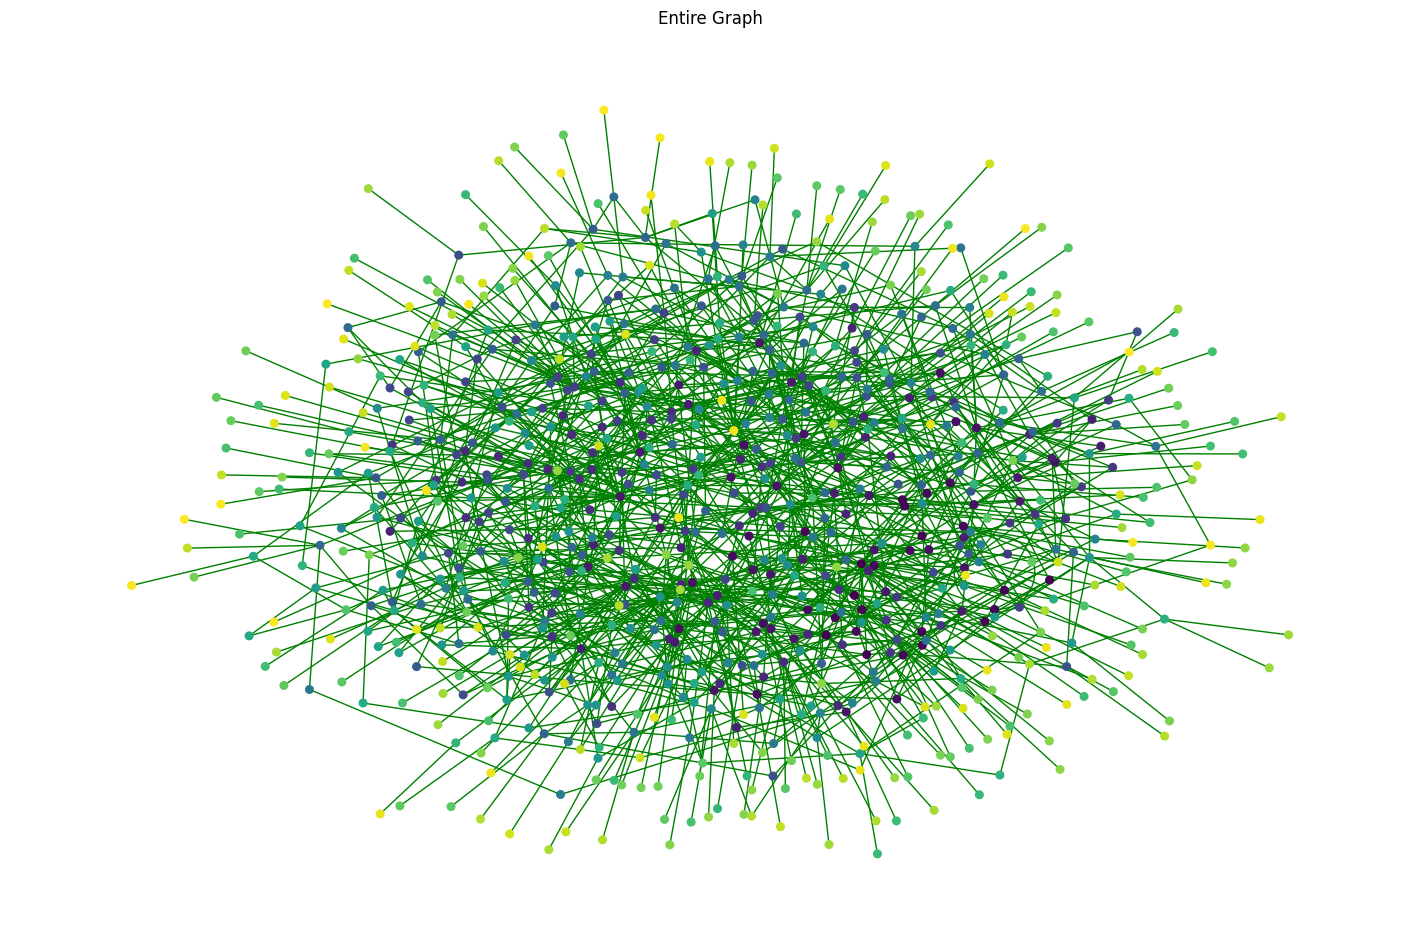

In [ ]:
# Create a new graph using networkx
G1 = nx.Graph()

# Add edges to the graph from pairs of values in the "test_data" dataframe
# Use zip to create pairs of (FromUser, ToUser)
G1.add_edges_from(zip(df_crime_connect['FromUser'], df_crime_connect['ToCrime']))

# Draw the graph
# Determine the positions of the nodes using Kamada-Kawai layout
layout = nx.kamada_kawai_layout(G1)
colors = np.linspace(0, 1, len(G1.nodes))
fig = plt.figure(figsize=(14, 9))

nx.draw(G1,
        node_size = 30,
        node_color = colors,
        pos = layout,
        edge_color = 'g',
        font_size = 8,
        font_family = 'sans-serif')
fig.set_facecolor('w')
plt.title("Entire Graph")

# Show the graph
plt.show()

### **2. Visualize High-Degree Nodes**

In [ ]:
# Create a new graph using networkx
G2 = nx.Graph()

# Add edges to the graph from pairs of values in the "test_data" dataframe
# Use zip to create pairs of (FromUser, ToUser)
G2.add_edges_from(zip(df_crime_connect['FromUser'], df_crime_connect['ToCrime']))

# Calculate the degree of each node in the graph
node_degrees = G2.degree()

# Sort nodes based on degree in descending order
sorted_nodes_by_degree = sorted(node_degrees, key=lambda x: x[1], reverse=True)

# Select the top nodes with the highest degree for visualization
top_degree_nodes = [node[0] for node in sorted_nodes_by_degree[:100]]
print("Top degree nodes:", top_degree_nodes)

Top degree nodes: ['815', '2', '425', '56', '110', '220', '153', '14', '43', '95', '356', '514', '39', '62', '112', '115', '161', '404', '413', '715', '78', '79', '87', '88', '146', '155', '225', '474', '531', '695', '36', '37', '46', '51', '97', '108', '152', '187', '214', '277', '336', '497', '10', '19', '24', '28', '67', '189', '190', '291', '344', '405', '592', '659', '696', '50', '60', '74', '82', '114', '159', '206', '242', '262', '290', '384', '396', '414', '435', '442', '515', '549', '729', '17', '29', '47', '57', '72', '77', '104', '128', '129', '169', '174', '221', '245', '251', '343', '370', '381', '502', '533', '536', '572', '690', '797', '1', '22', '23', '35']


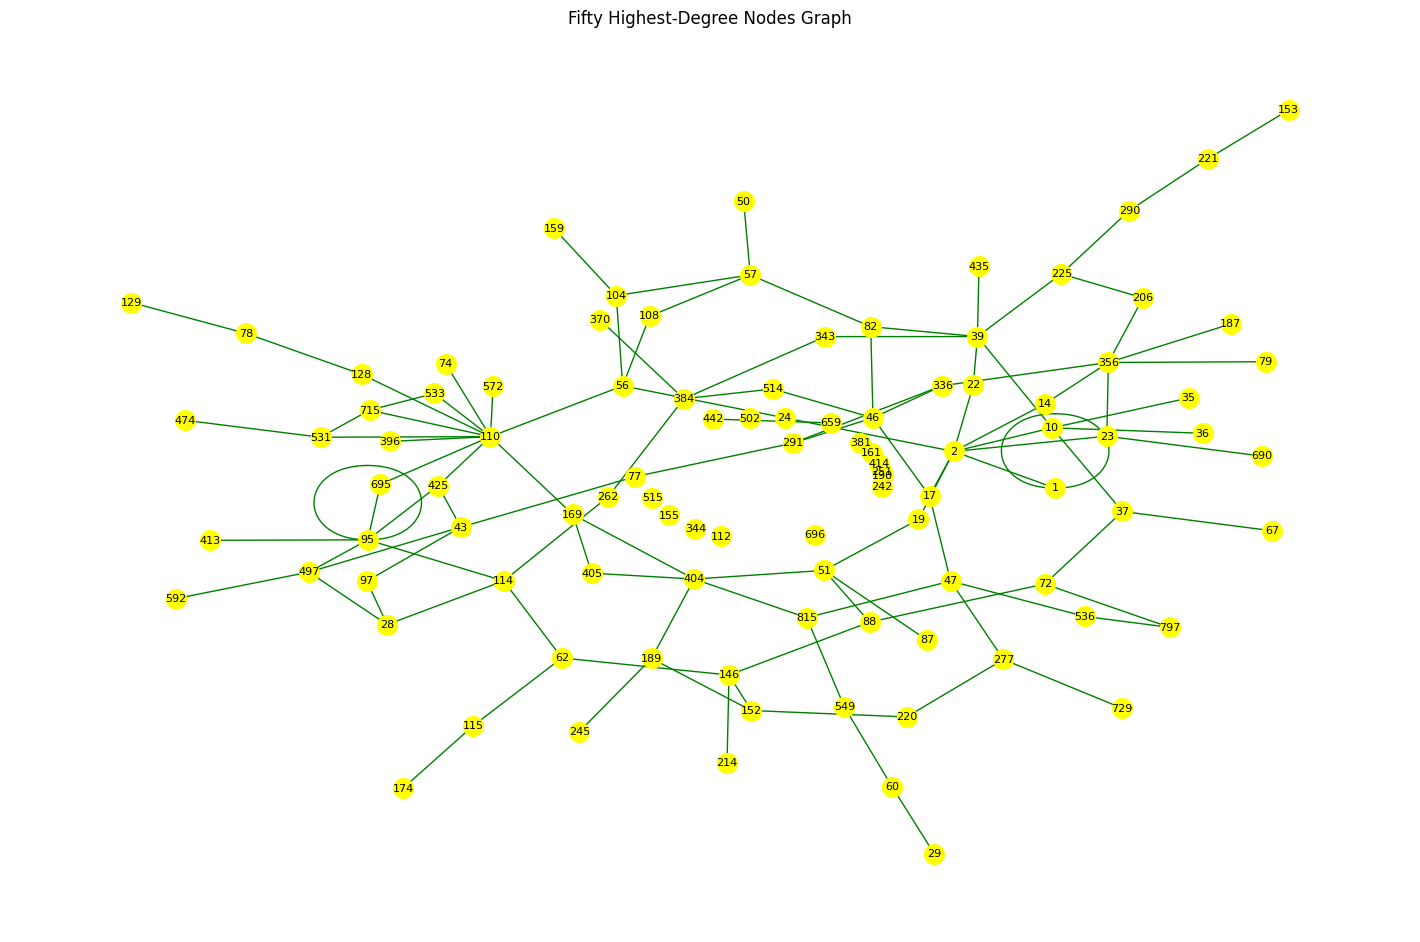

In [ ]:
# Create a subgraph containing only nodes with the highest degrees
subgraph = G2.subgraph(top_degree_nodes)

# Determine the positions of nodes using Kamada-Kawai layout
layout = nx.kamada_kawai_layout(subgraph)

# Draw the graph
fig = plt.figure(figsize=(14, 9))

nx.draw(subgraph,
        with_labels = True,
        node_size = 200,
        node_color = 'yellow',
        pos = layout,
        edge_color = 'green',
        font_size = 8,
        font_family = 'sans-serif')

fig.set_facecolor('w')

plt.title("Fifty Highest-Degree Nodes Graph")
# Show the graph
plt.show()